In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [64]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect= True)
# reflect the tables

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [62]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.

dt_string = '8/23/2017'
recent_time = datetime.strptime(dt_string, "%m/%d/%Y")
dt1_string = '8/23/2016'
begin_time = datetime.strptime(dt1_string, '%m/%d/%Y')

prcp = session.query(func.avg(Measurement.prcp), Measurement.date).\
filter(Measurement.date <= recent_time).\
filter(Measurement.date >= begin_time).group_by(Measurement.date).order_by(Measurement.date).all()
prcp

[(1.5549999999999997, '2016-08-24'),
 (0.07714285714285715, '2016-08-25'),
 (0.016666666666666666, '2016-08-26'),
 (0.06399999999999999, '2016-08-27'),
 (0.5166666666666666, '2016-08-28'),
 (0.24333333333333332, '2016-08-29'),
 (0.011666666666666667, '2016-08-30'),
 (0.6359999999999999, '2016-08-31'),
 (0.006, '2016-09-01'),
 (0.05, '2016-09-02'),
 (0.254, '2016-09-03'),
 (0.276, '2016-09-04'),
 (0.08499999999999999, '2016-09-05'),
 (0.246, '2016-09-06'),
 (0.3333333333333333, '2016-09-07'),
 (0.07666666666666667, '2016-09-08'),
 (0.17833333333333332, '2016-09-09'),
 (0.27999999999999997, '2016-09-10'),
 (0.25, '2016-09-11'),
 (0.308, '2016-09-12'),
 (0.45166666666666666, '2016-09-13'),
 (2.3800000000000003, '2016-09-14'),
 (0.8266666666666667, '2016-09-15'),
 (0.11714285714285715, '2016-09-16'),
 (0.13599999999999998, '2016-09-17'),
 (0.10600000000000001, '2016-09-18'),
 (0.064, '2016-09-19'),
 (0.14714285714285716, '2016-09-20'),
 (0.19499999999999998, '2016-09-21'),
 (0.205714285714

In [90]:
# Convert your results into a pandas DataFrame with date as index.
prcp_df = pd.DataFrame(prcp, columns = ['prcp', 'Date'])
prcp_df

,prcp,Date
0,1.555000,2016-08-24
1,0.077143,2016-08-25
2,0.016667,2016-08-26
3,0.064000,2016-08-27
4,0.516667,2016-08-28
...,...,...
360,0.030000,2017-08-19
361,0.005000,2017-08-20
362,0.193333,2017-08-21
363,0.166667,2017-08-22


<AxesSubplot:>

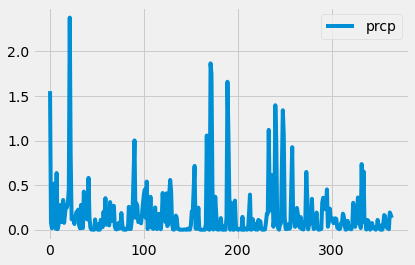

In [91]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()

In [92]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = prcp_df.describe()
summary

,prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [93]:
# Query total number of stations in dataset
stations_count = session.query(Station.id).count()
stations_count

9

In [104]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


active = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
active

most_active = active[0][0]

'USC00519281'

In [109]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station)
low_temp
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station)
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station)

In [ ]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.
temperature = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
                filter(Measurement.station == most_active_station).\
                filter(Measurement.date <= end_date).\
                filter(Measurement.date >= begin_date).\
                order_by(Measurement.date).all()

# Close session